### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [730]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 16:14:04


In [731]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [732]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to make the file of wss, sil scores open immediately
import os

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [733]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [734]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [735]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [736]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 16:14:04


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [737]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [738]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [739]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [740]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [741]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [742]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [743]:
# for sg variable
# sg = 0 # CBOW
sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=1, model=Skipgram


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [744]:
# vector_sizes = [50, 100, 150, 200, 250, 300]
# vector_sizes = [300, 325, 350, 400]
vector_sizes = [400, 410, 425, 450, 500]
selected_vector_size = vector_sizes[0]

In [745]:
windows = [3, 5, 7, 10, 12, 15, 20]
# windows = [8, 9, 10, 11, 12]
selected_window = windows[0]

In [746]:
epochs = [50, 100, 150, 200, 250]
# epochs = [5, 10, 20, 30, 40, 50, 60]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [747]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [748]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [749]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [750]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [751]:
copy_of_docs = documents

In [752]:
window = selected_window
epoch = selected_epoch
# vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [753]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [754]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [755]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [756]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for vector_size in vector_sizes:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.05 range
            sil_diff = best_Sil - sil
            wss_diff = best_WSS - wss
            if sil_diff >= 0 and sil_diff < 0.05 and wss_diff > 0:
                best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 16:14:07,514 : INFO : collecting all words and their counts
2025-03-09 16:14:07,517 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:07,519 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:07,522 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:07,524 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:07,525 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:07.525013', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:07,526 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 16:14:07 



2025-03-09 16:14:07,734 : INFO : EPOCH 6: training on 24723 raw words (4719 effective words) took 0.0s, 167349 effective words/s
2025-03-09 16:14:07,767 : INFO : EPOCH 7: training on 24723 raw words (4692 effective words) took 0.0s, 210001 effective words/s
2025-03-09 16:14:07,799 : INFO : EPOCH 8: training on 24723 raw words (4758 effective words) took 0.0s, 197418 effective words/s
2025-03-09 16:14:07,827 : INFO : EPOCH 9: training on 24723 raw words (4666 effective words) took 0.0s, 229911 effective words/s
2025-03-09 16:14:07,855 : INFO : EPOCH 10: training on 24723 raw words (4710 effective words) took 0.0s, 243692 effective words/s
2025-03-09 16:14:07,884 : INFO : EPOCH 11: training on 24723 raw words (4637 effective words) took 0.0s, 232676 effective words/s
2025-03-09 16:14:07,913 : INFO : EPOCH 12: training on 24723 raw words (4762 effective words) took 0.0s, 240808 effective words/s
2025-03-09 16:14:07,944 : INFO : EPOCH 13: training on 24723 raw words (4613 effective words) 

sg=1, Vector_Size=400, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:08 

Executing 5 start time: 2025-03-09 16:14:08
K=5: Silhouette Score and WSS=0.1104	2.1262

Cluster 0:
- US awaits Arab plan for Gaza, Trump plan remains default option: Washington
- Australia’s Johnson sees chance to shine while ‘Big Three’ quicks away
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad
- Atif Aslam’s breakup advice gains attention and debate
- Mariyam Nafees’ husband’s past marriage surprises fan

Cluster 1:
- Govt hikes RLNG prices by up to 1.86pc
- Stocks remain range-bound, KSE-100 closes 361 points lower
- PSX witnesses bearish trend, loses 360 points
- Pakistan CPI 2024 – deep-rooted corruption persists
- Israeli military killed 85 journalists in 2024: CPJ

Cluster 2:
- Pope Francis, 88, admitted for bronchitis treatment after struggling to speak
- Shab-e-Barat being observed with religious fervour across country
- PGF’s ‘train the trainers program’ b

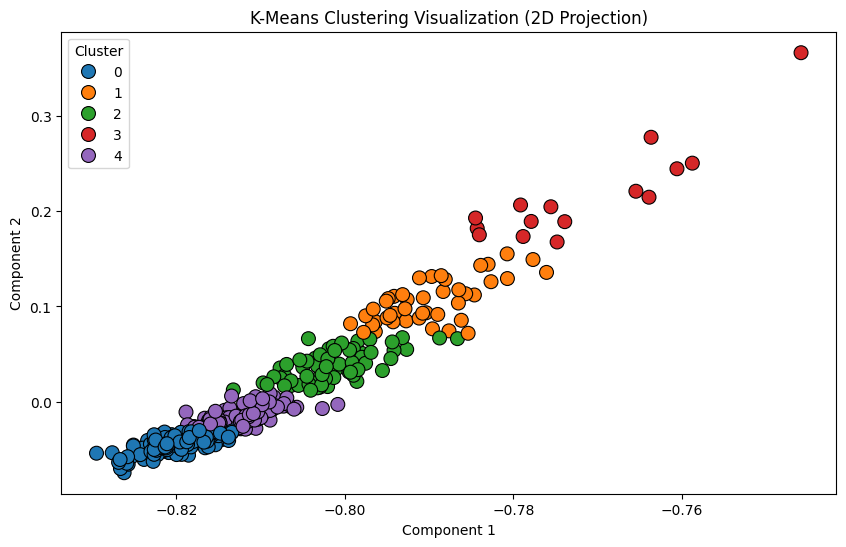

2025-03-09 16:14:09,088 : INFO : collecting all words and their counts
2025-03-09 16:14:09,088 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:09,089 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:09,094 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:09,096 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:09,098 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:09.098596', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:09,099 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:09 

Finished executing at: 2025-03-09 16:14:09 

Executed at: 2025-03-09 16:14:09 



2025-03-09 16:14:09,306 : INFO : EPOCH 6: training on 24723 raw words (4678 effective words) took 0.0s, 159685 effective words/s
2025-03-09 16:14:09,329 : INFO : EPOCH 7: training on 24723 raw words (4683 effective words) took 0.0s, 311807 effective words/s
2025-03-09 16:14:09,353 : INFO : EPOCH 8: training on 24723 raw words (4649 effective words) took 0.0s, 249074 effective words/s
2025-03-09 16:14:09,377 : INFO : EPOCH 9: training on 24723 raw words (4694 effective words) took 0.0s, 266358 effective words/s
2025-03-09 16:14:09,400 : INFO : EPOCH 10: training on 24723 raw words (4685 effective words) took 0.0s, 359070 effective words/s
2025-03-09 16:14:09,425 : INFO : EPOCH 11: training on 24723 raw words (4659 effective words) took 0.0s, 262685 effective words/s
2025-03-09 16:14:09,446 : INFO : EPOCH 12: training on 24723 raw words (4707 effective words) took 0.0s, 294281 effective words/s
2025-03-09 16:14:09,466 : INFO : EPOCH 13: training on 24723 raw words (4601 effective words) 

sg=1, Vector_Size=410, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:10 

Executing 5 start time: 2025-03-09 16:14:10
K=5: Silhouette Score and WSS=0.1156	1.9060

Cluster 0:
- PM condemns Harnai blast, vows action against culprits
- Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan
- Girl found dead, brother rescued after two years of captivity in Chakwal
- The Ultimate Guide to Healing Foods: Eat Your Way to Better Health
- Pope Francis, 88, admitted for bronchitis treatment after struggling to speak

Cluster 1:
- Man slays 4 kids before turning gun on himself
- Aurangzeb highlights increasing risks facing insurance industry
- Sabalenka, Gauff dumped out of Qatar Open
- Deepika Padukone talks exam stress, mental health
- 'Cobra Kai' stars Tanner Buchanan and Mary Mouser confirm relationship, spark engagement rumours

Cluster 2:
- Star Grammar School among 69 buildings sealed in Lahore
- Elahi’s plea: AC reserves verdict till 27th
- Over 500

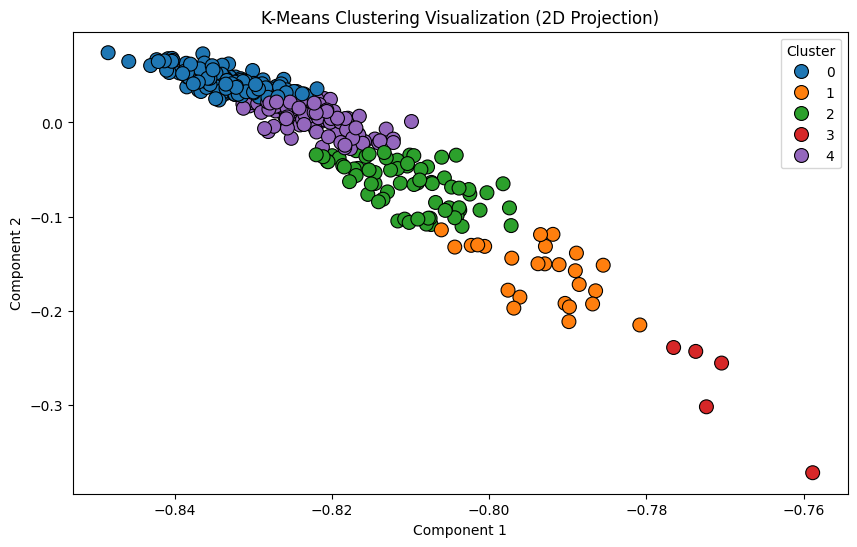

2025-03-09 16:14:10,837 : INFO : collecting all words and their counts
2025-03-09 16:14:10,839 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:10,839 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:10,846 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:10,850 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:10,853 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:10.853603', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:10,857 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:10 

Finished executing at: 2025-03-09 16:14:10 

Executed at: 2025-03-09 16:14:10 



2025-03-09 16:14:11,015 : INFO : EPOCH 5: training on 24723 raw words (4646 effective words) took 0.0s, 360580 effective words/s
2025-03-09 16:14:11,037 : INFO : EPOCH 6: training on 24723 raw words (4773 effective words) took 0.0s, 287508 effective words/s
2025-03-09 16:14:11,063 : INFO : EPOCH 7: training on 24723 raw words (4715 effective words) took 0.0s, 236032 effective words/s
2025-03-09 16:14:11,084 : INFO : EPOCH 8: training on 24723 raw words (4750 effective words) took 0.0s, 379202 effective words/s
2025-03-09 16:14:11,105 : INFO : EPOCH 9: training on 24723 raw words (4659 effective words) took 0.0s, 287233 effective words/s
2025-03-09 16:14:11,134 : INFO : EPOCH 10: training on 24723 raw words (4675 effective words) took 0.0s, 230492 effective words/s
2025-03-09 16:14:11,155 : INFO : EPOCH 11: training on 24723 raw words (4648 effective words) took 0.0s, 425692 effective words/s
2025-03-09 16:14:11,173 : INFO : EPOCH 12: training on 24723 raw words (4647 effective words) t

sg=1, Vector_Size=425, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:13 

Executing 5 start time: 2025-03-09 16:14:13
K=5: Silhouette Score and WSS=0.1192	1.9636

Cluster 0:
- Balochistan CM announces Pink scooties, electric bikes scheme
- Commissioner travels in People’s Bus Service, takes information about facilities
- South Korea’s Yoon back in court for impeachment hearing
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Turkish President Erdogan receives guard of honour at PM House

Cluster 1:
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- Reforming pension funds in Pakistan: a sustainable approach
- Ahmed Ali Akbar and Maham Batool Kickstart Their Wedding with a Qawwali Night
- Sabrina Carpenter's 'Bad Reviews' lyrics spark rumors about Barry Keoghan after clues in album
- Mehwish Hayat is making her TV comeback with a dark, chilling role for 7th Sky Entertainment

Cluster 2:
- Pope Francis taken to hospital for bron

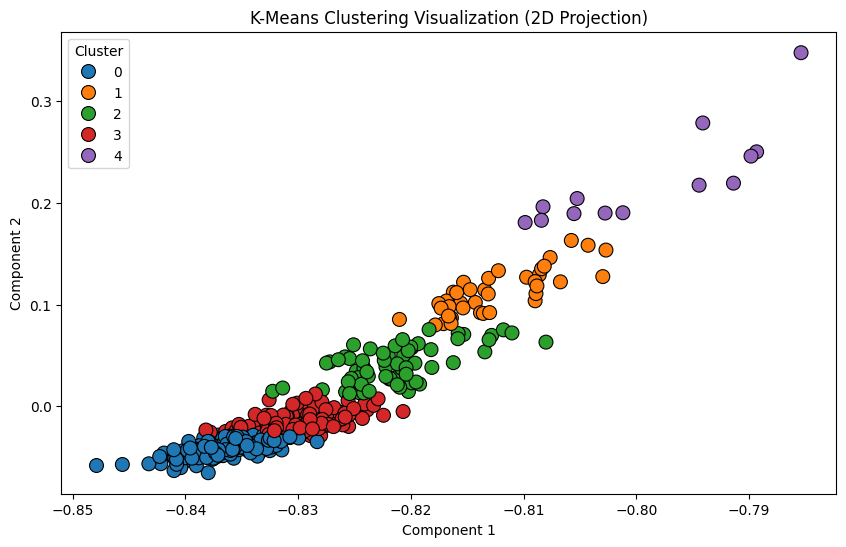

2025-03-09 16:14:14,934 : INFO : collecting all words and their counts
2025-03-09 16:14:14,938 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:14,941 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:14,963 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:14,970 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:14,974 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:14.974332', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:14,979 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:14 

Finished executing at: 2025-03-09 16:14:14 

Executed at: 2025-03-09 16:14:14 



2025-03-09 16:14:15,238 : INFO : EPOCH 1: training on 24723 raw words (4650 effective words) took 0.1s, 52783 effective words/s
2025-03-09 16:14:15,339 : INFO : EPOCH 2: training on 24723 raw words (4664 effective words) took 0.1s, 84961 effective words/s
2025-03-09 16:14:15,430 : INFO : EPOCH 3: training on 24723 raw words (4771 effective words) took 0.1s, 85859 effective words/s
2025-03-09 16:14:15,484 : INFO : EPOCH 4: training on 24723 raw words (4629 effective words) took 0.0s, 109104 effective words/s
2025-03-09 16:14:15,553 : INFO : EPOCH 5: training on 24723 raw words (4685 effective words) took 0.1s, 84721 effective words/s
2025-03-09 16:14:15,624 : INFO : EPOCH 6: training on 24723 raw words (4702 effective words) took 0.1s, 89698 effective words/s
2025-03-09 16:14:15,696 : INFO : EPOCH 7: training on 24723 raw words (4770 effective words) took 0.1s, 84466 effective words/s
2025-03-09 16:14:15,773 : INFO : EPOCH 8: training on 24723 raw words (4713 effective words) took 0.1s,

sg=1, Vector_Size=450, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:18 

Executing 5 start time: 2025-03-09 16:14:18
K=5: Silhouette Score and WSS=0.1154	2.0676

Cluster 0:
- Aurat March kickstarts in February this year
- Man slays 4 kids before turning gun on himself
- Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan
- 'Cobra Kai' stars Tanner Buchanan and Mary Mouser confirm relationship, spark engagement rumours
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance

Cluster 1:
- Azaan Sami Khan pens birthday note for daughter
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- ‘We risk losing hold on reality’: Scarlett Johansson slams AI video of stars protesting against Kanye
- Kanye West returns to X after Antisemitic rant, fans say 'the black vans paid a visit'
- Pakistan, Turkiye sign multiple agreements to boost bilateral relations

Cluster 2:
- Wasim Akram joins Meer Gro

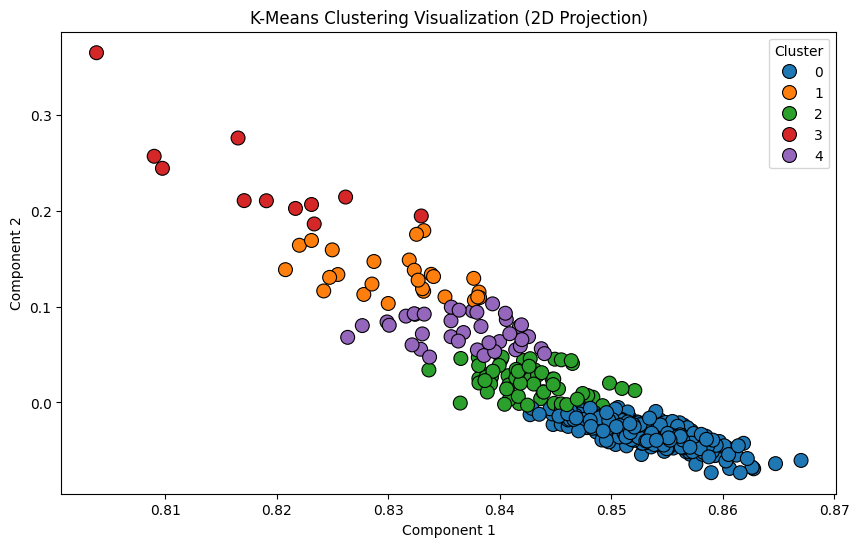

2025-03-09 16:14:19,650 : INFO : collecting all words and their counts
2025-03-09 16:14:19,652 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:19,654 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:19,666 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:19,672 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:19,676 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:19.676332', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:19,679 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:19 

Finished executing at: 2025-03-09 16:14:19 

Executed at: 2025-03-09 16:14:19 



2025-03-09 16:14:19,853 : INFO : EPOCH 1: training on 24723 raw words (4663 effective words) took 0.0s, 104663 effective words/s
2025-03-09 16:14:19,919 : INFO : EPOCH 2: training on 24723 raw words (4641 effective words) took 0.1s, 89860 effective words/s
2025-03-09 16:14:19,990 : INFO : EPOCH 3: training on 24723 raw words (4773 effective words) took 0.1s, 86998 effective words/s
2025-03-09 16:14:20,063 : INFO : EPOCH 4: training on 24723 raw words (4663 effective words) took 0.1s, 77692 effective words/s
2025-03-09 16:14:20,131 : INFO : EPOCH 5: training on 24723 raw words (4669 effective words) took 0.1s, 90062 effective words/s
2025-03-09 16:14:20,208 : INFO : EPOCH 6: training on 24723 raw words (4680 effective words) took 0.1s, 85510 effective words/s
2025-03-09 16:14:20,280 : INFO : EPOCH 7: training on 24723 raw words (4723 effective words) took 0.1s, 88213 effective words/s
2025-03-09 16:14:20,352 : INFO : EPOCH 8: training on 24723 raw words (4734 effective words) took 0.1s,

sg=1, Vector_Size=500, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:23 

Executing 5 start time: 2025-03-09 16:14:23
K=5: Silhouette Score and WSS=0.1193	1.9586

Cluster 0:
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance
- ‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network
- Taco Bell security guard caught on video slapping female customer in shocking incident
- Justin Bieber’s comment on Keke Palmer’s post raises eyebrows amid Hailey Bieber divorce rumors
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries

Cluster 1:
- PM Shehbaz invites Turkish businessmen to invest in Pakistan’s diverse fields
- Reforming pension funds in Pakistan: a sustainable approach
- Ahmed Ali Akbar and Maham Batool Kickstart Their Wedding with a Qawwali Night
- Kanye West returns to X after Antisemitic rant, fans say 'the black vans paid a visit'
- Fashion designer Mehmood Bhatti alleges assault by lawyers i

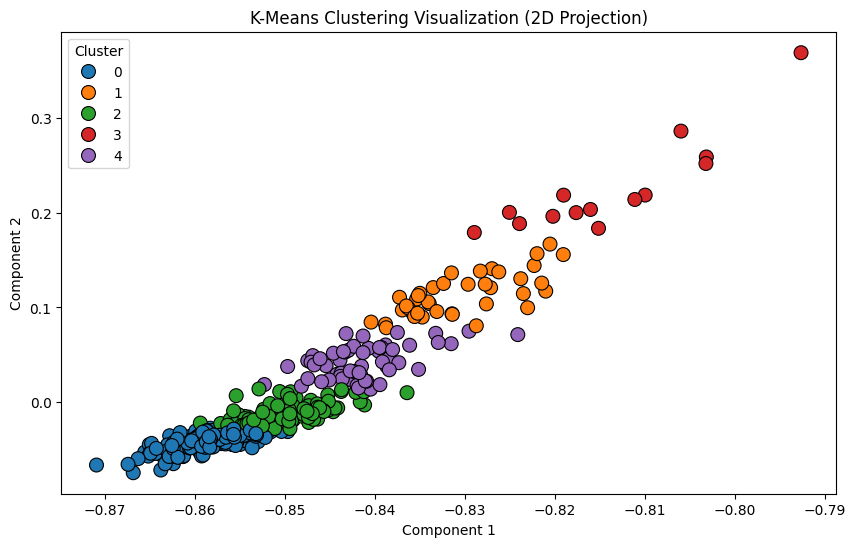

Finished displaying at: 2025-03-09 16:14:24 

Finished executing at: 2025-03-09 16:14:24 



In [757]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 16:14:24,153 : INFO : collecting all words and their counts
2025-03-09 16:14:24,159 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:24,164 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:24,181 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:24,191 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:24,198 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:24.197727', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:24,204 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 16:14:24 



2025-03-09 16:14:24,350 : INFO : EPOCH 0: training on 24723 raw words (4679 effective words) took 0.1s, 63283 effective words/s
2025-03-09 16:14:24,432 : INFO : EPOCH 1: training on 24723 raw words (4679 effective words) took 0.1s, 82649 effective words/s
2025-03-09 16:14:24,508 : INFO : EPOCH 2: training on 24723 raw words (4668 effective words) took 0.1s, 78629 effective words/s
2025-03-09 16:14:24,593 : INFO : EPOCH 3: training on 24723 raw words (4670 effective words) took 0.1s, 78333 effective words/s
2025-03-09 16:14:24,671 : INFO : EPOCH 4: training on 24723 raw words (4737 effective words) took 0.1s, 80724 effective words/s
2025-03-09 16:14:24,755 : INFO : EPOCH 5: training on 24723 raw words (4792 effective words) took 0.1s, 75423 effective words/s
2025-03-09 16:14:24,837 : INFO : EPOCH 6: training on 24723 raw words (4660 effective words) took 0.1s, 83202 effective words/s
2025-03-09 16:14:24,905 : INFO : EPOCH 7: training on 24723 raw words (4729 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:28 

Executing 9 start time: 2025-03-09 16:14:28
K=9: Silhouette Score and WSS=0.0964	1.6571

Cluster 0:
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries
- PM condemns Harnai blast, vows action against culprits
- Kanye West and Bianca Censori deny divorce rumours amid controversies
- Europe, Kyiv warn Trump against ‘dirty deal’ on Ukraine
- Adani to restore full power to Bangladesh in days but differences remain, say sources

Cluster 1:
- Pakistan CPI 2024 – deep-rooted corruption persists
- Umair Jaswal, Hadiqa Kiani, and Shae Gill to headline Lahooti 2025
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- JazzCash, Mobilink Bank named finalists for prestigious GLOMO Awards 2025
- FPSC issues latest public notice regarding CSS Exams 2025

Cluster 2:
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Na

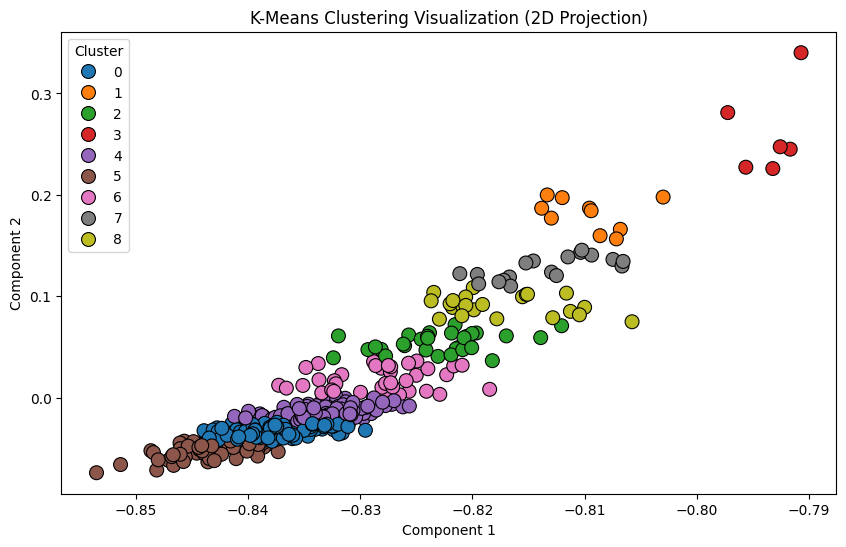

2025-03-09 16:14:29,344 : INFO : collecting all words and their counts
2025-03-09 16:14:29,347 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:29,349 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:29,363 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:29,370 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:29,374 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:29.374812', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:29,379 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:29 

Finished executing at: 2025-03-09 16:14:29 

Executed at: 2025-03-09 16:14:29 



2025-03-09 16:14:29,517 : INFO : EPOCH 0: training on 24723 raw words (4636 effective words) took 0.1s, 74436 effective words/s
2025-03-09 16:14:29,587 : INFO : EPOCH 1: training on 24723 raw words (4632 effective words) took 0.1s, 84695 effective words/s
2025-03-09 16:14:29,739 : INFO : EPOCH 2: training on 24723 raw words (4737 effective words) took 0.1s, 49015 effective words/s
2025-03-09 16:14:29,894 : INFO : EPOCH 3: training on 24723 raw words (4613 effective words) took 0.1s, 43707 effective words/s
2025-03-09 16:14:29,995 : INFO : EPOCH 4: training on 24723 raw words (4540 effective words) took 0.1s, 70751 effective words/s
2025-03-09 16:14:30,049 : INFO : EPOCH 5: training on 24723 raw words (4619 effective words) took 0.0s, 129151 effective words/s
2025-03-09 16:14:30,107 : INFO : EPOCH 6: training on 24723 raw words (4745 effective words) took 0.0s, 114488 effective words/s
2025-03-09 16:14:30,162 : INFO : EPOCH 7: training on 24723 raw words (4727 effective words) took 0.0s

sg=1, Vector_Size=410, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:33 

Executing 9 start time: 2025-03-09 16:14:33
K=9: Silhouette Score and WSS=0.0907	1.7293

Cluster 0:
- Two soldiers hurt in Indian firing at LoC
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Ohio State Buckeyes faces quarterback battle, adds Matt Patricia as DC
- PM Modi Meets Elon Musk in Washington, Discusses Tech Ties Amid Trump Tariff Threats
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival

Cluster 1:
- Pakistan on new journey towards stability, prosperity, says Rana Mashhood
- PM thanks President Erdogan for visiting Pakistan
- ‘Will Send it Straight to PM’, Army Chief on Imran Khan’s letters
- Pakistan set for economic growth after stability: PM
- HBL and S&P launch Pakistan’s first Purchasing Managers’ Index

Cluster 2:
- May 9 crossed all limits, says CB judge
- Sri Lanka hammer Australia in record 174-run rout
- Sri Lanka shares end 

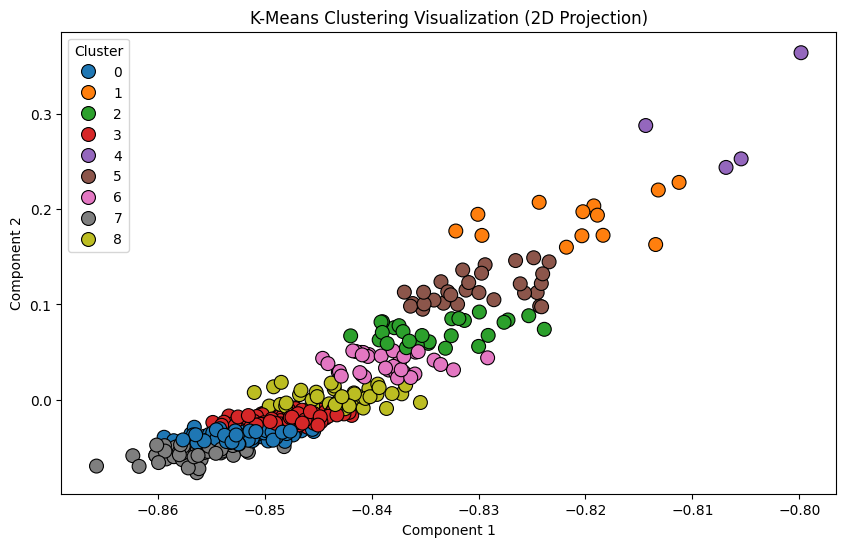

2025-03-09 16:14:34,374 : INFO : collecting all words and their counts
2025-03-09 16:14:34,376 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:34,378 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:34,388 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:34,395 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:34,402 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:34.402039', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:34,406 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:34 

Finished executing at: 2025-03-09 16:14:34 

Executed at: 2025-03-09 16:14:34 



2025-03-09 16:14:34,644 : INFO : EPOCH 2: training on 24723 raw words (4719 effective words) took 0.0s, 105380 effective words/s
2025-03-09 16:14:34,713 : INFO : EPOCH 3: training on 24723 raw words (4615 effective words) took 0.1s, 81125 effective words/s
2025-03-09 16:14:34,795 : INFO : EPOCH 4: training on 24723 raw words (4649 effective words) took 0.1s, 73795 effective words/s
2025-03-09 16:14:34,866 : INFO : EPOCH 5: training on 24723 raw words (4618 effective words) took 0.1s, 82554 effective words/s
2025-03-09 16:14:34,946 : INFO : EPOCH 6: training on 24723 raw words (4700 effective words) took 0.1s, 71057 effective words/s
2025-03-09 16:14:35,019 : INFO : EPOCH 7: training on 24723 raw words (4672 effective words) took 0.1s, 82255 effective words/s
2025-03-09 16:14:35,083 : INFO : EPOCH 8: training on 24723 raw words (4673 effective words) took 0.0s, 108100 effective words/s
2025-03-09 16:14:35,138 : INFO : EPOCH 9: training on 24723 raw words (4764 effective words) took 0.0s

sg=1, Vector_Size=425, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:38 

Executing 9 start time: 2025-03-09 16:14:38
K=9: Silhouette Score and WSS=0.0907	1.8211

Cluster 0:
- India seen seeking global bids this year for 114 fighters
- Rapper Gillie Da Kid claims 17-Year-Old Noah Scurry killed his son before being shot dead
- Sri Lanka hammer Australia in record 174-run rout
- Deadly blast in Harnai kills 11 coal miners, injures four
- SBP injects over Rs 1.9 trillion in market

Cluster 1:
- Over 16,000 School Teacher Jobs 2025 – Here’s all you need to know
- Champions Trophy 2025: squads, groups and schedule
- UK Pound further climbs up against Pakistani rupee – 14 February 2025
- List of players to miss Champions Trophy 2025
- Feb 14 last date to submit third installment for Hajj 2025

Cluster 2:
- Awareness session on harassment at workplace held
- Europe warns Trump against Ukraine deal ‘behind our backs’
- Kanye West returns to X after Antisemitic rant, fans say 'the

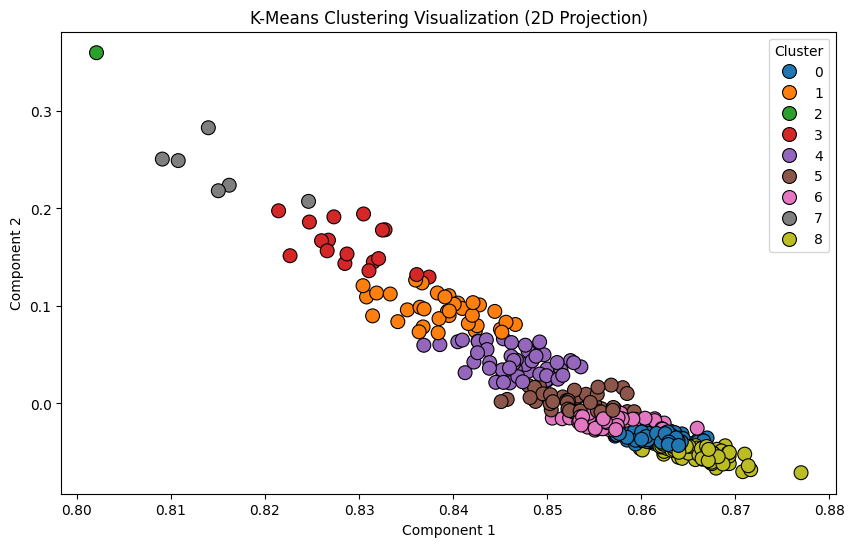

2025-03-09 16:14:38,972 : INFO : collecting all words and their counts
2025-03-09 16:14:38,975 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:38,976 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:38,985 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:38,987 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:38,990 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:38.990944', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:38,993 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:38 

Finished executing at: 2025-03-09 16:14:38 

Executed at: 2025-03-09 16:14:38 



2025-03-09 16:14:39,210 : INFO : EPOCH 2: training on 24723 raw words (4653 effective words) took 0.0s, 95340 effective words/s
2025-03-09 16:14:39,276 : INFO : EPOCH 3: training on 24723 raw words (4686 effective words) took 0.1s, 90893 effective words/s
2025-03-09 16:14:39,337 : INFO : EPOCH 4: training on 24723 raw words (4599 effective words) took 0.0s, 93627 effective words/s
2025-03-09 16:14:39,401 : INFO : EPOCH 5: training on 24723 raw words (4698 effective words) took 0.1s, 93952 effective words/s
2025-03-09 16:14:39,459 : INFO : EPOCH 6: training on 24723 raw words (4700 effective words) took 0.0s, 103345 effective words/s
2025-03-09 16:14:39,520 : INFO : EPOCH 7: training on 24723 raw words (4656 effective words) took 0.0s, 94168 effective words/s
2025-03-09 16:14:39,585 : INFO : EPOCH 8: training on 24723 raw words (4654 effective words) took 0.1s, 89733 effective words/s
2025-03-09 16:14:39,646 : INFO : EPOCH 9: training on 24723 raw words (4613 effective words) took 0.0s,

sg=1, Vector_Size=450, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:42 

Executing 9 start time: 2025-03-09 16:14:42
K=9: Silhouette Score and WSS=0.1143	1.5436

Cluster 0:
- Injuries disrupted England’s training during India ODI series: McCullum
- Balochistan CM announces Pink scooties, electric bikes scheme
- Punjab home secretary visits Business Facilitation Centre
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Aurangzeb highlights increasing risks facing insurance industry

Cluster 1:
- Sri Lanka shares end higher; central bank sees inflation peak above target in Q2 next year
- Pakistan set 243-run target for New Zealand in Tri-Nation series final
- Afghan asylum seeker arrested after car ramming attack wounds 28 in Germany
- CM Maryam announces 3-marla plots for homeless people
- Paramount channels, including CBS and Nickelodeon, to go dark on YouTube TV

Cluster 2:
- Lahore set to host 9th Faiz Festival 2025 from today
- List of 

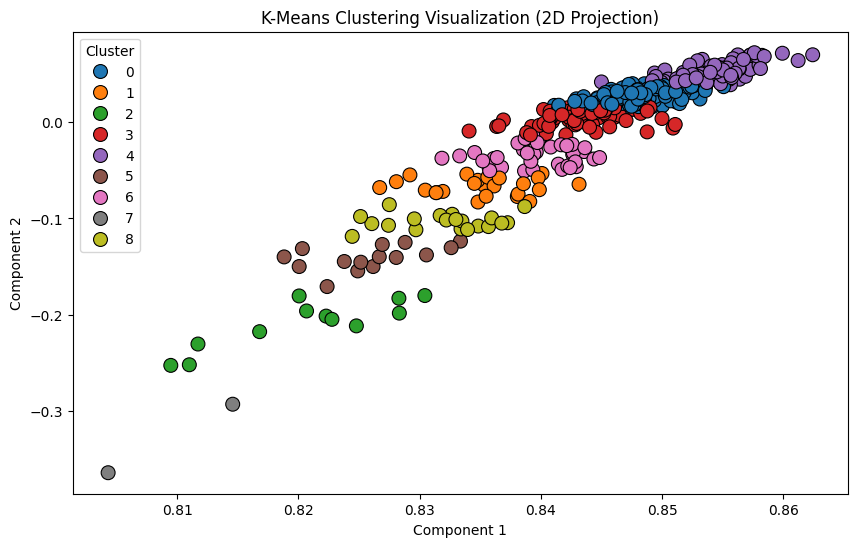

2025-03-09 16:14:43,299 : INFO : collecting all words and their counts
2025-03-09 16:14:43,302 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:43,303 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:43,311 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:43,315 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:43,317 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:43.317887', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:43,323 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:43 

Finished executing at: 2025-03-09 16:14:43 

Executed at: 2025-03-09 16:14:43 



2025-03-09 16:14:43,545 : INFO : EPOCH 2: training on 24723 raw words (4780 effective words) took 0.1s, 90959 effective words/s
2025-03-09 16:14:43,609 : INFO : EPOCH 3: training on 24723 raw words (4746 effective words) took 0.1s, 92315 effective words/s
2025-03-09 16:14:43,669 : INFO : EPOCH 4: training on 24723 raw words (4794 effective words) took 0.0s, 109445 effective words/s
2025-03-09 16:14:43,802 : INFO : EPOCH 5: training on 24723 raw words (4583 effective words) took 0.1s, 50330 effective words/s
2025-03-09 16:14:43,919 : INFO : EPOCH 6: training on 24723 raw words (4677 effective words) took 0.1s, 67541 effective words/s
2025-03-09 16:14:44,024 : INFO : EPOCH 7: training on 24723 raw words (4648 effective words) took 0.1s, 71267 effective words/s
2025-03-09 16:14:44,108 : INFO : EPOCH 8: training on 24723 raw words (4650 effective words) took 0.1s, 80504 effective words/s
2025-03-09 16:14:44,170 : INFO : EPOCH 9: training on 24723 raw words (4648 effective words) took 0.0s,

sg=1, Vector_Size=500, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:47 

Executing 9 start time: 2025-03-09 16:14:47
K=9: Silhouette Score and WSS=0.0896	1.6026

Cluster 0:
- Injuries disrupted England’s training during India ODI series: McCullum
- Economic indicators showing positive trends, says Khurram Schehzad
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- Supreme Court updates seniority list with new judges
- PIA financial closure deadline shortened by 4 months

Cluster 1:
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Israeli military killed 85 journalists in 2024: CPJ
- Feb 14 last date to submit third installment for Hajj 2025
- Champions Trophy 2025: squads, groups and schedule
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025

Cluster 2:
- Hamas expected to name Israeli hostages it will free this weekend
- Turkish President Erdogan receives guard of honour at PM House
- KP govt prepares to launch

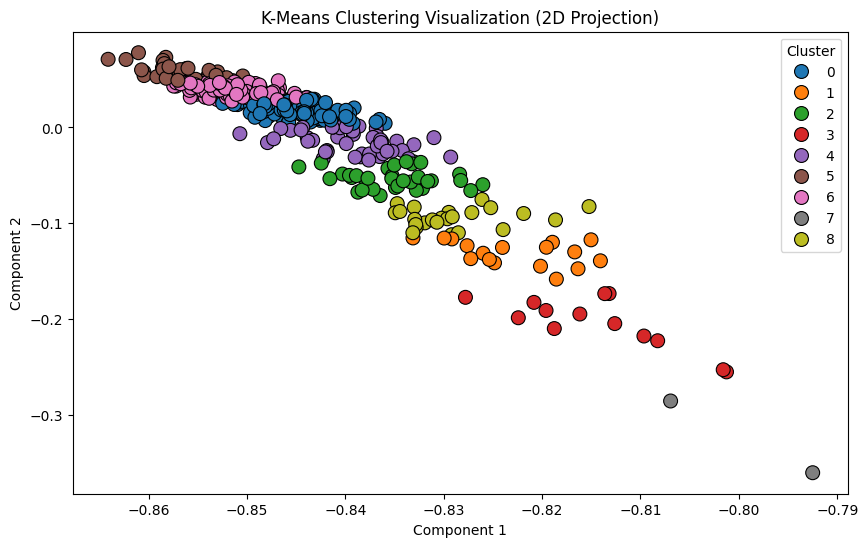

Finished displaying at: 2025-03-09 16:14:48 

Finished executing at: 2025-03-09 16:14:48 



In [758]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 16:14:48,357 : INFO : collecting all words and their counts
2025-03-09 16:14:48,362 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:48,366 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:48,382 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:48,386 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:48,391 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:48.391879', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:48,394 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 16:14:48 



2025-03-09 16:14:48,508 : INFO : Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2025-03-09T16:14:48.503831', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'build_vocab'}
2025-03-09 16:14:48,516 : INFO : Word2Vec lifecycle event {'msg': 'training model with 4 workers on 38 vocabulary and 400 features, using sg=1 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2025-03-09T16:14:48.516885', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 16:14:48,613 : INFO : EPOCH 0: training on 24723 raw words (4624 effective words) took 0.1s, 63864 effective words/s
2025-03-09 16:14:48,672 : INFO : EPOCH 1: training on 24723 raw words (4688 effective words) took 0.0s, 105017 effective words/s
2025-03-0

sg=1, Vector_Size=400, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:51 

Executing 13 start time: 2025-03-09 16:14:51
K=13: Silhouette Score and WSS=0.0964	1.5854

Cluster 0:
- Aurangzeb highlights increasing risks facing insurance industry
- Balochistan CM announces Pink scooties, electric bikes scheme
- Minister takes notice of difficulties in Umrah vaccination, orders more counters
- PGF’s ‘train the trainers program’ boosts golf coaching in Pakistan
- CJP Afridi administers oath to newly-appointed SC judges

Cluster 1:
- Hubco expands into EV charging sector with new subsidiary, partners with PSO
- Pope Francis, 88, admitted for bronchitis treatment after struggling to speak
- Kanye West returns to X after Antisemitic rant, fans say 'the black vans paid a visit'
- Workshop stresses for shaping equitable, sustainable food systems
- Musk threatens to withdraw $97B OpenAI bid unless nonprofit shift stops

Cluster 2:
- Pakistan’s 2nd polio case of 2025 reported in Badin


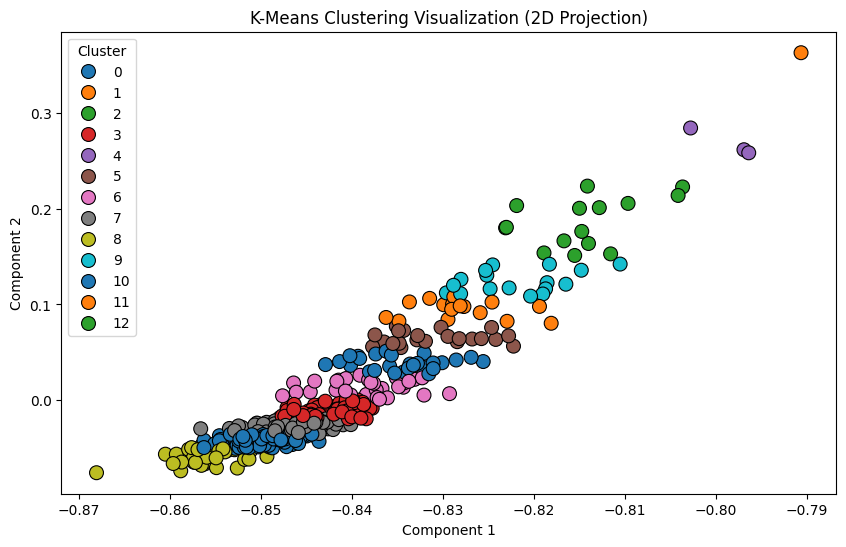

2025-03-09 16:14:53,239 : INFO : collecting all words and their counts
2025-03-09 16:14:53,243 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:53,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:53,258 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:53,262 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:53,265 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:53.265011', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:53,268 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:53 

Finished executing at: 2025-03-09 16:14:53 

Executed at: 2025-03-09 16:14:53 



2025-03-09 16:14:53,565 : INFO : EPOCH 1: training on 24723 raw words (4669 effective words) took 0.1s, 61389 effective words/s
2025-03-09 16:14:53,724 : INFO : EPOCH 2: training on 24723 raw words (4625 effective words) took 0.1s, 44380 effective words/s
2025-03-09 16:14:53,815 : INFO : EPOCH 3: training on 24723 raw words (4667 effective words) took 0.1s, 60679 effective words/s
2025-03-09 16:14:53,891 : INFO : EPOCH 4: training on 24723 raw words (4756 effective words) took 0.1s, 89874 effective words/s
2025-03-09 16:14:53,951 : INFO : EPOCH 5: training on 24723 raw words (4580 effective words) took 0.0s, 96950 effective words/s
2025-03-09 16:14:54,014 : INFO : EPOCH 6: training on 24723 raw words (4737 effective words) took 0.0s, 95786 effective words/s
2025-03-09 16:14:54,094 : INFO : EPOCH 7: training on 24723 raw words (4718 effective words) took 0.1s, 75746 effective words/s
2025-03-09 16:14:54,166 : INFO : EPOCH 8: training on 24723 raw words (4688 effective words) took 0.1s, 

sg=1, Vector_Size=410, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:14:57 

Executing 13 start time: 2025-03-09 16:14:57
K=13: Silhouette Score and WSS=0.0920	1.5497

Cluster 0:
- Karachi basketball at crossroads as rival factions clash
- IGP pays tributes to police martyrs of Faisal Chowk Mall Road tragedy
- PTI backed military courts after APS attack, says Justice Hilali
- Burnt body of missing Karachi young man found
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- US Attorney General Pam Bondi files lawsuit against New York's immigration law
- India, US agree to resolve trade and tariff rows after Trump-Modi talks
- Kinnaird College, PMAA equip young women with self-defense skills
- Did Elon Musk’s son really tell Trump to 'shush your f***ing mouth up' in the Oval Office?
- IK urges army chief to revisit policies in ‘best national interest’

Cluster 2:
- Pakistan CPI 2024 – deep-rooted corruption persists
- List of players to miss Champion

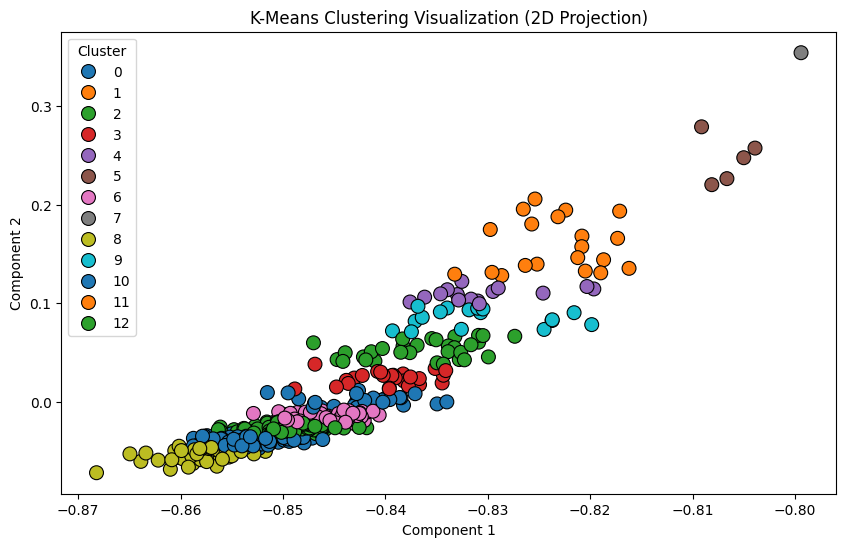

2025-03-09 16:14:58,416 : INFO : collecting all words and their counts
2025-03-09 16:14:58,420 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:14:58,423 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:14:58,435 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:14:58,438 : INFO : Creating a fresh vocabulary
2025-03-09 16:14:58,442 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:14:58.441629', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:14:58,448 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:14:58 

Finished executing at: 2025-03-09 16:14:58 

Executed at: 2025-03-09 16:14:58 



2025-03-09 16:14:58,653 : INFO : EPOCH 0: training on 24723 raw words (4636 effective words) took 0.1s, 52696 effective words/s
2025-03-09 16:14:58,786 : INFO : EPOCH 1: training on 24723 raw words (4621 effective words) took 0.1s, 56562 effective words/s
2025-03-09 16:14:58,875 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.1s, 75335 effective words/s
2025-03-09 16:14:58,943 : INFO : EPOCH 3: training on 24723 raw words (4705 effective words) took 0.0s, 96697 effective words/s
2025-03-09 16:14:59,005 : INFO : EPOCH 4: training on 24723 raw words (4592 effective words) took 0.0s, 96126 effective words/s
2025-03-09 16:14:59,063 : INFO : EPOCH 5: training on 24723 raw words (4665 effective words) took 0.0s, 102950 effective words/s
2025-03-09 16:14:59,115 : INFO : EPOCH 6: training on 24723 raw words (4718 effective words) took 0.0s, 125074 effective words/s
2025-03-09 16:14:59,180 : INFO : EPOCH 7: training on 24723 raw words (4656 effective words) took 0.0s

sg=1, Vector_Size=425, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:15:02 

Executing 13 start time: 2025-03-09 16:15:02
K=13: Silhouette Score and WSS=0.0949	1.4857

Cluster 0:
- JUI-F chief stands with journalists against PECA law
- ‘Is this the same team?’: Cricket fans rejoice as Pakistan clinches record-breaking victory against South Africa
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- AJK interior minister claims India behind smuggling, IED incidents along LoC
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin

Cluster 1:
- Breathe Pakistan: A cleaner tomorrow, one step at a time
- PM Shehbaz invites Turkish businessmen to invest in Pakistan’s diverse fields
- Hasan Raheem softens down his song 'Obvious'
- Turkiye President Erdogan touches down in Pakistan
- China’s yuan strengthens as central bank pledges to keep exchange rate stable

Cluster 2:
- Champions Trophy 2025: squads, groups and schedule
- Pakistan Air 

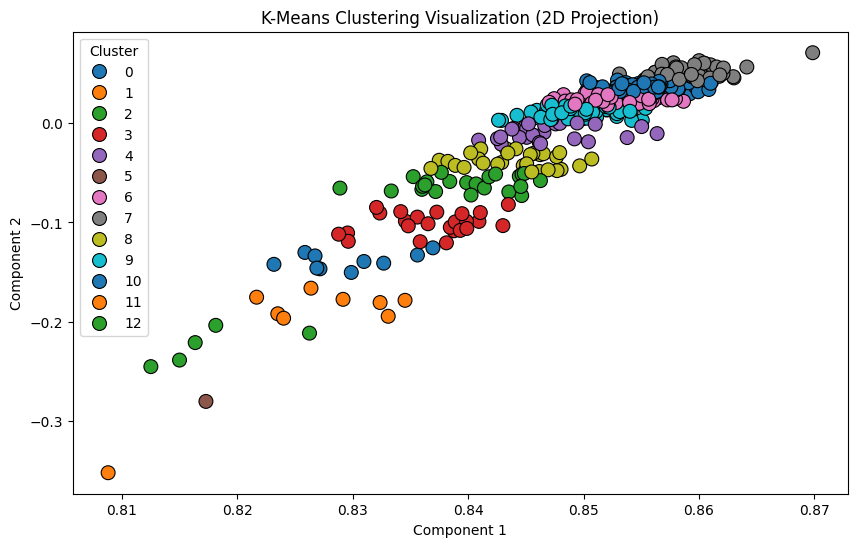

2025-03-09 16:15:04,834 : INFO : collecting all words and their counts
2025-03-09 16:15:04,836 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:15:04,838 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:15:04,847 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:15:04,849 : INFO : Creating a fresh vocabulary
2025-03-09 16:15:04,853 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:15:04.853651', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:15:04,856 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:15:04 

Finished executing at: 2025-03-09 16:15:04 

Executed at: 2025-03-09 16:15:04 



2025-03-09 16:15:05,061 : INFO : EPOCH 1: training on 24723 raw words (4624 effective words) took 0.1s, 77288 effective words/s
2025-03-09 16:15:05,139 : INFO : EPOCH 2: training on 24723 raw words (4780 effective words) took 0.1s, 79358 effective words/s
2025-03-09 16:15:05,208 : INFO : EPOCH 3: training on 24723 raw words (4610 effective words) took 0.1s, 84262 effective words/s
2025-03-09 16:15:05,275 : INFO : EPOCH 4: training on 24723 raw words (4602 effective words) took 0.1s, 86785 effective words/s
2025-03-09 16:15:05,334 : INFO : EPOCH 5: training on 24723 raw words (4780 effective words) took 0.0s, 107053 effective words/s
2025-03-09 16:15:05,388 : INFO : EPOCH 6: training on 24723 raw words (4633 effective words) took 0.0s, 107892 effective words/s
2025-03-09 16:15:05,451 : INFO : EPOCH 7: training on 24723 raw words (4656 effective words) took 0.1s, 86599 effective words/s
2025-03-09 16:15:05,517 : INFO : EPOCH 8: training on 24723 raw words (4682 effective words) took 0.0s

sg=1, Vector_Size=450, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:15:07 

Executing 13 start time: 2025-03-09 16:15:07
K=13: Silhouette Score and WSS=0.0879	1.4940

Cluster 0:
- Aurangzeb discusses Pakistan’s structural reforms with IFC chief
- South African rand firms after Trump’s tariff move; local budget next week
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries
- Jeffrey Sachs: Trump's tariff policy bound to fail
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- From Napa to Rada: Actor Hani Taha’s journey to the world’s premier drama school
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival
- US Navy aircraft carrier collides with merchant ship near Egypt, Suez Canal
- Kubra Khan and Gohar Rasheed are officially married!
- Marwat reaffirms unwavering loyalty to Imran Khan

Cluster 2:
- Champions Trophy 2025: squads, groups and schedule
- UK Pound further climbs up against Pakista

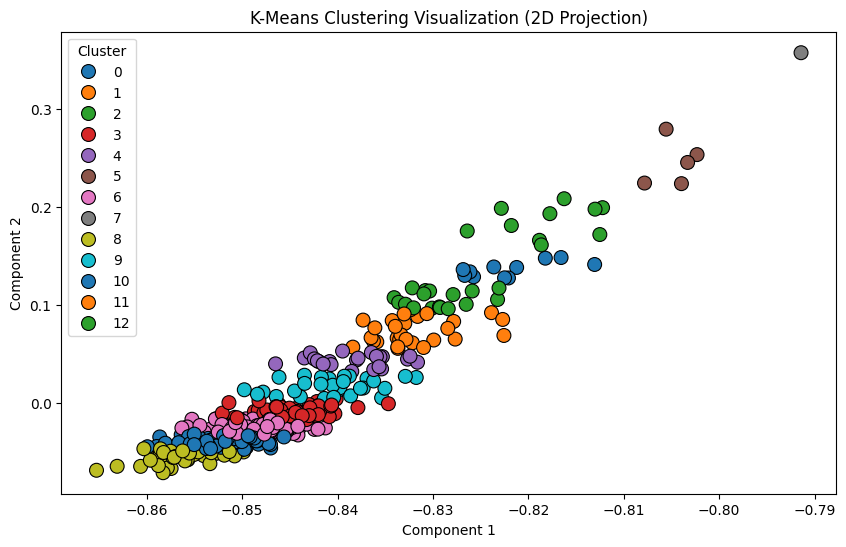

2025-03-09 16:15:08,971 : INFO : collecting all words and their counts
2025-03-09 16:15:08,974 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:15:08,976 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:15:08,986 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:15:08,990 : INFO : Creating a fresh vocabulary
2025-03-09 16:15:08,993 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:15:08.993642', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:15:08,997 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:15:08 

Finished executing at: 2025-03-09 16:15:08 

Executed at: 2025-03-09 16:15:08 



2025-03-09 16:15:09,158 : INFO : EPOCH 1: training on 24723 raw words (4679 effective words) took 0.0s, 94156 effective words/s
2025-03-09 16:15:09,225 : INFO : EPOCH 2: training on 24723 raw words (4656 effective words) took 0.1s, 87563 effective words/s
2025-03-09 16:15:09,284 : INFO : EPOCH 3: training on 24723 raw words (4672 effective words) took 0.0s, 103007 effective words/s
2025-03-09 16:15:09,349 : INFO : EPOCH 4: training on 24723 raw words (4666 effective words) took 0.1s, 90777 effective words/s
2025-03-09 16:15:09,425 : INFO : EPOCH 5: training on 24723 raw words (4692 effective words) took 0.1s, 79147 effective words/s
2025-03-09 16:15:09,488 : INFO : EPOCH 6: training on 24723 raw words (4651 effective words) took 0.0s, 96184 effective words/s
2025-03-09 16:15:09,550 : INFO : EPOCH 7: training on 24723 raw words (4688 effective words) took 0.1s, 92166 effective words/s
2025-03-09 16:15:09,613 : INFO : EPOCH 8: training on 24723 raw words (4843 effective words) took 0.1s,

sg=1, Vector_Size=500, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:15:12 

Executing 13 start time: 2025-03-09 16:15:12
K=13: Silhouette Score and WSS=0.0862	1.5109

Cluster 0:
- ‘Wacky Races’ character designer Jerry Eisenberg dies at 87
- Oscar winner Bong Joon-ho returns to big screen with Mickey 17
- Customs officials, chamber president kidnapped in K-P
- Jeffrey Sachs: Trump's tariff policy bound to fail
- Law ministry notifies appointments of six SC judges, four high court chief justices

Cluster 1:
- Govt has no plan to impose new taxes: NA told
- Sri Lanka complete clean sweep over Australia in ODI series
- ECC approves transfer of shares of DISCOs in President of Pakistan’s name
- PlayStation state of play returns with new games, trailers, and updates
- Breathe Pakistan: A cleaner tomorrow, one step at a time

Cluster 2:
- Champions Trophy 2025: squads, groups and schedule
- Champions Trophy 2025 Prize Money Breakdown in Pakistani rupee for 2025
- US regulator ope

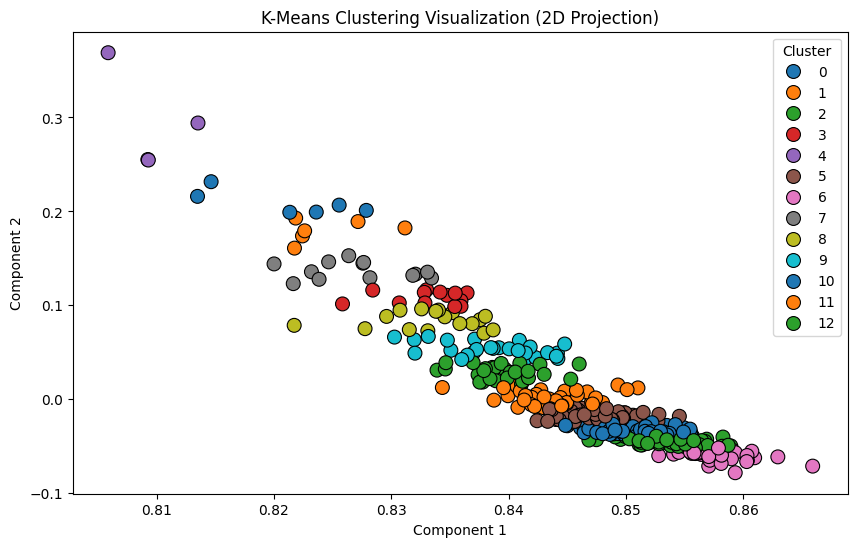

Finished displaying at: 2025-03-09 16:15:12 

Finished executing at: 2025-03-09 16:15:12 



In [759]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [761]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

# Open the file automatically
os.startfile("clustering_results.csv")

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,400,3,50,Skipgram,0.110438,2.126195
1,5,Word2Vec,410,3,50,Skipgram,0.115565,1.906046
2,5,Word2Vec,425,3,50,Skipgram,0.119218,1.963598
3,5,Word2Vec,450,3,50,Skipgram,0.115384,2.067593
4,5,Word2Vec,500,3,50,Skipgram,0.119256,1.958569
5,9,Word2Vec,400,3,50,Skipgram,0.096400,1.657093
6,9,Word2Vec,410,3,50,Skipgram,0.090694,1.729320
7,9,Word2Vec,425,3,50,Skipgram,0.090712,1.821123
8,9,Word2Vec,450,3,50,Skipgram,0.114290,1.543578
9,9,Word2Vec,500,3,50,Skipgram,0.089600,1.602625


In [762]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,2.004400
1,9,1.670748
2,13,1.525141


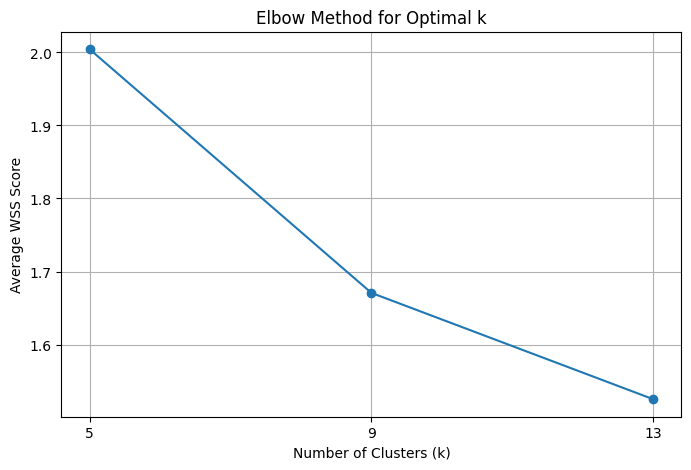

In [763]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [764]:
best_combination # vector size, window size, epoch

[13, 'word', 'Skipgram', 425, 3, 50, 0.09491624, 1.4856635332107544]